In [165]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('seaborn-whitegrid')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import time
import gc

In [166]:
# read the cleaned data from last workshop
start_time = time.time()
df = pd.read_csv('./COVID_complete.csv', engine='python') 

#Estimates time taken for the action
print('Time taken:'+str((time.time() - start_time))+' seconds')  
del start_time

Time taken:0.053856611251831055 seconds


In [167]:
df
# print(df.index) #Print all indexes in the df
# print(len(df.columns))
df.info()
# df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     902 non-null    int64  
 1   case_in_country        705 non-null    float64
 2   reporting date         902 non-null    object 
 3   location               902 non-null    object 
 4   country                902 non-null    object 
 5   gender                 902 non-null    object 
 6   symptom_onset          558 non-null    object 
 7   If_onset_approximated  555 non-null    float64
 8   hosp_visit_date        505 non-null    object 
 9   exposure_start         119 non-null    object 
 10  exposure_end           320 non-null    object 
 11  visiting Wuhan         902 non-null    int64  
 12  from Wuhan             898 non-null    float64
 13  death                  902 non-null    object 
 14  recovered              902 non-null    object 
 15  sympto

In [168]:
df.head()


,id,case_in_country,reporting date,location,country,gender,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,Unnamed: 26
0,1,NaN,1/20/2020,"Shenzhen, Guangdong",China,male,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN
1,2,NaN,1/20/2020,Shanghai,China,female,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN
2,3,NaN,1/21/2020,Zhejiang,China,male,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN
3,4,NaN,1/21/2020,Tianjin,China,female,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,äººæ°‘æ—¥æŠ¥å®˜æ–¹å¾®å�š,https://m.weibo.cn/status/4463235401268457?,NaN
4,5,NaN,1/21/2020,Tianjin,China,male,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,äººæ°‘æ—¥æŠ¥å®˜æ–¹å¾®å�š,https://m.weibo.cn/status/4463235401268457?,NaN


In [169]:

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['id' 'case_in_country' 'If_onset_approximated' 'visiting Wuhan'
 'from Wuhan' 'Unnamed: 26']


In [171]:

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['reporting date' 'location' 'country' 'gender' 'symptom_onset'
 'hosp_visit_date' 'exposure_start' 'exposure_end' 'death' 'recovered'
 'symptom' 'source' 'link']


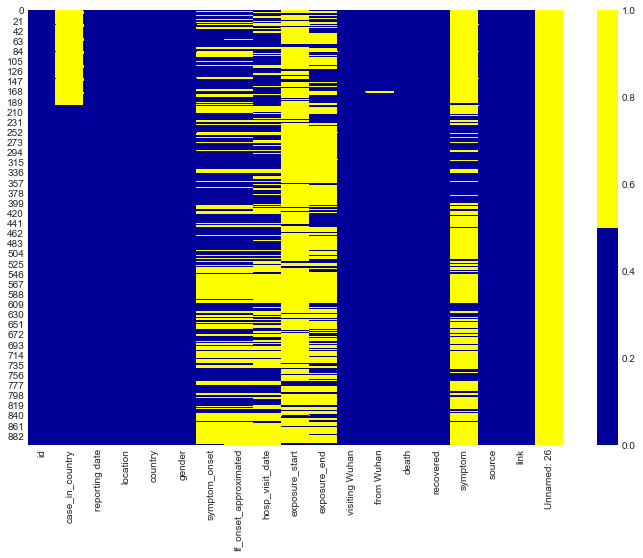

In [172]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [173]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
case_in_country - 22.0%
reporting date - 0.0%
location - 0.0%
country - 0.0%
gender - 0.0%
symptom_onset - 38.0%
If_onset_approximated - 38.0%
hosp_visit_date - 44.0%
exposure_start - 87.0%
exposure_end - 65.0%
visiting Wuhan - 0.0%
from Wuhan - 0.0%
death - 0.0%
recovered - 0.0%
symptom - 70.0%
source - 0.0%
link - 0.0%
Unnamed: 26 - 100.0%


created missing indicator for: case_in_country
created missing indicator for: symptom_onset
created missing indicator for: If_onset_approximated
created missing indicator for: hosp_visit_date
created missing indicator for: exposure_start
created missing indicator for: exposure_end
created missing indicator for: from Wuhan
created missing indicator for: symptom
created missing indicator for: Unnamed: 26


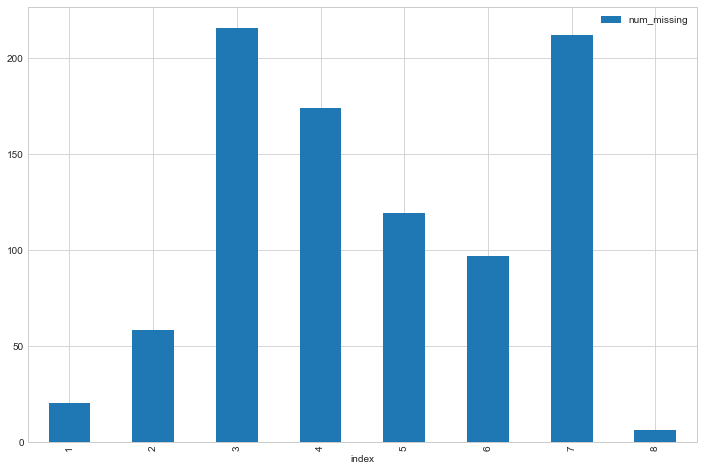

In [174]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

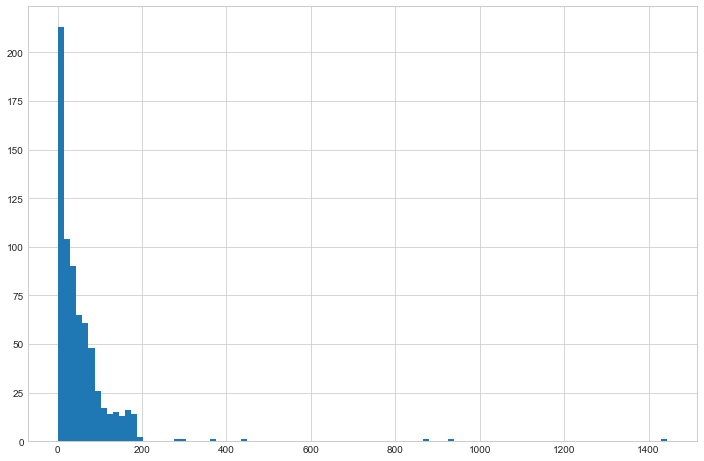

In [175]:
# histogram of a particular feature 'duration'.
df['case_in_country'].hist(bins=100)

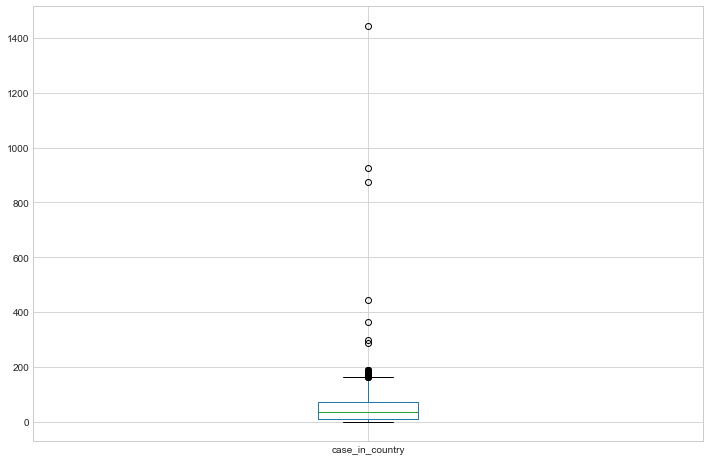

In [176]:
# box plot.
df.boxplot(column=['case_in_country'])

In [177]:
df['case_in_country'].describe()

count     705.000000
mean       54.651064
std        86.266897
min         1.000000
25%        12.000000
50%        35.000000
75%        72.000000
max      1443.000000
Name: case_in_country, dtype: float64

In [46]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               902 non-null    int64  
 1   case_in_country                  705 non-null    float64
 2   reporting date                   902 non-null    object 
 3   location                         902 non-null    object 
 4   country                          902 non-null    object 
 5   gender                           902 non-null    object 
 6   symptom_onset                    558 non-null    object 
 7   If_onset_approximated            555 non-null    float64
 8   hosp_visit_date                  505 non-null    object 
 9   exposure_start                   119 non-null    object 
 10  exposure_end                     320 non-null    object 
 11  visiting Wuhan                   902 non-null    int64  
 12  from Wuhan            

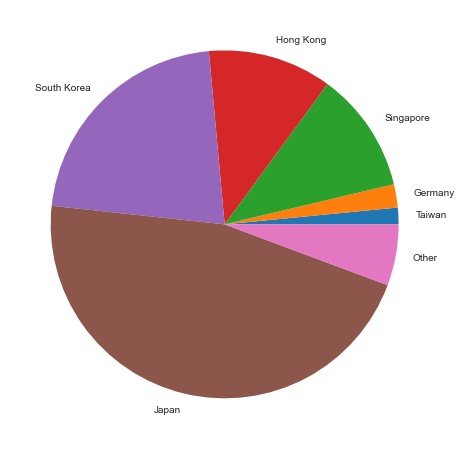

In [178]:
cat_totals = df.groupby("country")["case_in_country"].sum().sort_values()
small_cat_totals = cat_totals[cat_totals < 500]
big_cat_totals = cat_totals[cat_totals > 500]
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])
big_cat_totals = big_cat_totals.append(small_sums)
big_cat_totals.plot(kind="pie", label="")

In [219]:
df['symptom'] = df['symptom'].str.replace('feaver', 'fever')
symptoms_data = df['symptom'].dropna()
symptoms_data

194    fever, cough, difficult in breathing
195    fever, cough, difficult in breathing
196                                   fever
217                                   fever
221                                   fever
                       ...                 
836                                   cough
851               fever, cough, sore throat
854                                   fever
861                      sore throat, fever
880                                   cough
Name: symptom, Length: 269, dtype: object

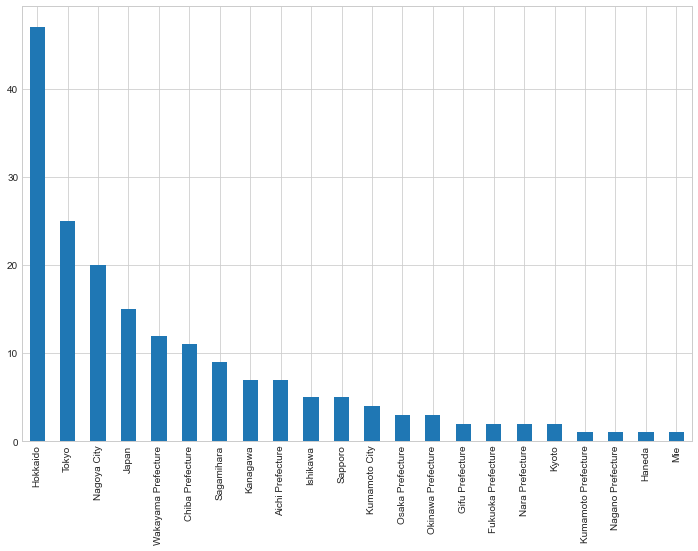

In [180]:
# get 
japan_location = df[df['country'] == 'Japan' ]
japan_location['location'].value_counts().plot(kind='bar')